# cleaning data of yachts

#### scraping file names to download from my different repository and download theam to data/raw 

In [5]:
import requests
import json
import os
import numpy as np
from bs4 import BeautifulSoup

url = 'https://github.com/Hinski2/webScraperForBoats/tree/main/output'

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
script_tag = soup.find('script', {'data-target': 'react-app.embeddedData', 'type': 'application/json'})
data = json.loads(script_tag.string)
print(data)

data = data['payload']['tree']['items']
print(data)

items = [item['path'] for item in data]
print(items)
    
base_link = "https://github.com/Hinski2/webScraperForBoats/raw/main/"
output_dir = '../data/raw' 

if not os.path.exists('../data/raw'):
    os.makedirs('../data/raw', exist_ok=True)
    
    for item in items: 
        file_link = base_link + item 
        file_name = item.split('/')[-1]
        response = requests.get(file_link)
        
        path = os.path.join(output_dir, file_name)
        if os.path.isfile(path):
            continue
        
        with open(path, "wb") as f: 
            f.write(response.content)

{'payload': {'allShortcutsEnabled': False, 'path': 'output', 'repo': {'id': 829411100, 'defaultBranch': 'main', 'name': 'webScraperForYachtsData', 'ownerLogin': 'Hinski2', 'currentUserCanPush': False, 'isFork': False, 'isEmpty': False, 'createdAt': '2024-07-16T11:26:41.000Z', 'ownerAvatar': 'https://avatars.githubusercontent.com/u/72402069?v=4', 'public': True, 'private': False, 'isOrgOwned': False}, 'currentUser': None, 'refInfo': {'name': 'main', 'listCacheKey': 'v0:1721129230.0', 'canEdit': False, 'refType': 'branch', 'currentOid': '2767a3f70d5a35d1675ad3994c91dbab3afd2369'}, 'tree': {'items': [{'name': 'ARG.xlsx', 'path': 'output/ARG.xlsx', 'contentType': 'file'}, {'name': 'AUS.xlsx', 'path': 'output/AUS.xlsx', 'contentType': 'file'}, {'name': 'AUT.xlsx', 'path': 'output/AUT.xlsx', 'contentType': 'file'}, {'name': 'BRA.xlsx', 'path': 'output/BRA.xlsx', 'contentType': 'file'}, {'name': 'BUL.xlsx', 'path': 'output/BUL.xlsx', 'contentType': 'file'}, {'name': 'CAN.xlsx', 'path': 'outpu

#### making one big dataFrame

In [6]:
import pandas as pd 

df = pd.DataFrame()
if not os.path.exists('../data/raw/database.xlsx'):
	for item in items:
		file_name = '../data/raw/' + item.split('/')[-1]
		df = pd.concat([df, pd.read_excel(file_name)])
		print(f"added {file_name} to df")
  
		df.to_excel("../data/raw/database.xlsx") #saveing dataframe
else: 
    df = pd.read_excel('../data/raw/database.xlsx').drop('Unnamed: 0', axis=1)

df

,Class,Designer,Builder,Age date,Series date,Offset file,Data file,Length Overall,Maximum Beam,Draft,...,Headsail Flying rated,Asymmetric measured,Asymmetric rated,Quad. Mainsail measured,Quad. Mainsail rated,Mizzen Staysail measured,Mizzen Staysail rated,Mast rake,Mast cant angle,JZ
0,Millennium 38,J. SOTO,Ast. Millennium M.,02/2008,01/1999,ARG5133nk.OFF,ARG5133O,11.770 m,3.636 m,2.265 m,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NESTOR VOLKER,NaN,01/1983,01/1983,ARG2122.off,ARG2122,12.250 m,3.862 m,1.338 m,...,52.32,92.08,92.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FIRST 44.7,FARR,BENETEAU,10/2003,10/2003,FIRST447-DK.off,URU77,13.352 m,3.968 m,2.626 m,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SOTO 33,JAVIER SOTO ACEBAL,NaN,01/2012,01/2012,S33.OFF,ARG07,10.160 m,3.130 m,2.161 m,...,NaN,123.49,123.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SOTO 33,JAVIER SOTO ACEBAL,NaN,01/2012,01/2012,S33.OFF,ARG06,10.160 m,3.130 m,2.161 m,...,NaN,123.49,123.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,Beneteau 36,Manuard,BENETEAU,09/2023,01/2022,FIRST36.OFF,USA 61733,10.966 m,3.794 m,2.230 m,...,58.20,126.75,126.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11532,Cal 30,Lapworth,Jensen Marine,05/1964,01/1961,cal30a.off,US7018,9.305 m,2.932 m,1.461 m,...,NaN,57.57,57.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11533,FARR 395,FARR,CARROLL,05/2002,08/2000,FARR395.off,USA 7395,12.010 m,3.688 m,2.379 m,...,NaN,158.59,158.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11534,AERODYNE 38,Rodger Martin,Aerodyne Yachts,01/2001,01/1999,AERODYNE38.off,US6294,11.552 m,3.992 m,2.416 m,...,NaN,155.44,155.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## data analys

#### checking corelation between ims division and boat speed

In [7]:
df['IMS Division'].dropna().unique()

array(['Cruiser/Racer', 'Performance', 'Sportboat'], dtype=object)

In [8]:
df.columns.tolist()

['Class',
 'Designer',
 'Builder',
 'Age date',
 'Series date',
 'Offset file',
 'Data file',
 'Length Overall',
 'Maximum Beam',
 'Draft',
 'Displacement',
 'DLR',
 'IMS Division',
 'Dynamic Allowance',
 'Age Allowance',
 'Mainsail measured',
 'Mainsail rated',
 'Headsail Luffed measured',
 'Headsail Luffed rated',
 'Symmetric measured',
 'Symmetric rated',
 'Forestay tension',
 'Inner stay',
 'Mast material',
 'Single headsail furler',
 'Mainsail furler',
 'Articulated bowsprit',
 'Non-circular rigging',
 'Fiber rigging',
 'Adjustable mast foot',
 'Runners/Checkstays',
 'Spreaders',
 'Rotating mast',
 'P',
 'IG',
 'ISP',
 'MDT1',
 'MDL1',
 'MDT2',
 'MDL2',
 'TL',
 'MW',
 'GO',
 'E',
 'J',
 'BAS',
 'FSD',
 'SFJ',
 'SPL',
 'WPL',
 'TPS',
 'BD',
 'MWT',
 'MCG',
 'Beat Angles 6 kt',
 'Beat Angles 8 kt',
 'Beat Angles 10 kt',
 'Beat Angles 12 kt',
 'Beat Angles 14 kt',
 'Beat Angles 16 kt',
 'Beat Angles 20 kt',
 'Beat Angles 24 kt',
 'Beat VMG 6 kt',
 'Beat VMG 8 kt',
 'Beat VMG 10 kt',


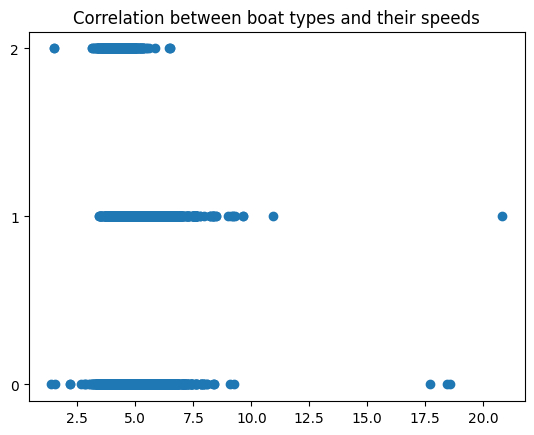

8501
1878
1133


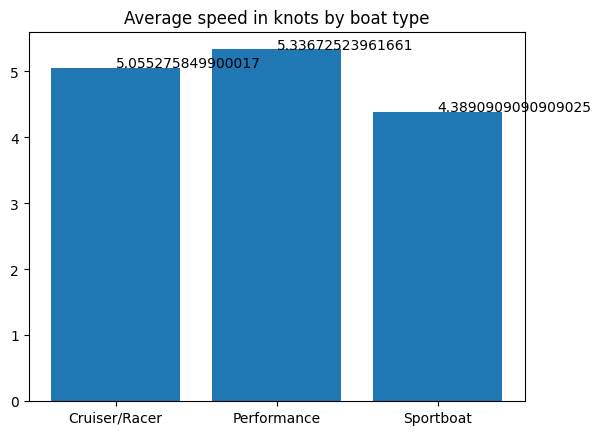

In [9]:
import matplotlib.pyplot as plt
int_of_div = {'Cruiser/Racer': 0, 
              'Performance': 1, 
              'Sportboat': 2}

filteredDf = df.dropna(subset=['Beat VMG 24 kt', 'IMS Division'])
plt.scatter(list(filteredDf['Beat VMG 24 kt']), list(map(lambda x: int_of_div[x], filteredDf['IMS Division'])))
plt.title('Correlation between boat types and their speeds')
plt.yticks(range(3))
plt.show()

# we can see corelation between ims division and boat speed

speedList = [0 for _ in range(3)]
for i in range(len(filteredDf)):
    speedList[int_of_div[filteredDf.iloc[i]['IMS Division']]] += filteredDf.iloc[i]['Beat VMG 24 kt']

print(len(filteredDf[filteredDf['IMS Division'] == 'Cruiser/Racer']))
print(len(filteredDf[filteredDf['IMS Division'] == 'Performance']))
print(len(filteredDf[filteredDf['IMS Division'] == 'Sportboat']))

speedList[0] /= len(filteredDf[filteredDf['IMS Division'] == 'Cruiser/Racer'])
speedList[1] /= len(filteredDf[filteredDf['IMS Division'] == 'Performance'])
speedList[2] /= len(filteredDf[filteredDf['IMS Division'] == 'Sportboat'])

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

names = ['Cruiser/Racer', 'Performance', 'Sportboat']
plt.bar(names, speedList)
addlabels(names, speedList)
plt.title('Average speed in knots by boat type')
plt.show()


In [10]:
print(len(df['Class'].unique().tolist()))
data = pd.DataFrame(df.groupby('Class').size())
data.sort_values(by=0, ascending=False)

3840


,0
Class,
FIRST 40.7,94
First 36.7,93
FIRST 36.7,71
J-80 OD,68
X-35 OD,59
...,...
ZUANELLI 34,1
Zilvermeeuw,1
Zuanelli 401,1


In [11]:
df['Age date']

0        02/2008
1        01/1983
2        10/2003
3        01/2012
4        01/2012
          ...   
11531    09/2023
11532    05/1964
11533    05/2002
11534    01/2001
11535    01/2007
Name: Age date, Length: 11536, dtype: object

In [12]:
# small test 
data = {
    'Date': ['01/1999', '02/2000', '12/2021']
}
data = pd.DataFrame(data)

pd.to_datetime(data['Date'], format='%m/%Y').max()

Timestamp('2021-12-01 00:00:00')

#### data cleaning

I have to drop some not important columns and clean data eg. 12.527 m -> 12.527

In [13]:
# some german certificates doesn't have RIG section, so to make predictions i will skipp this data
 
df = df.drop(['Class', 'Designer', 'Builder', 'Age date', 'Offset file', 'Data file', 'Forestay tension', 'Inner stay', 'Mast material', 'Single headsail furler', 'Mainsail furler', 'Articulated bowsprit', 'Non-circular rigging', 'Fiber rigging', 'Adjustable mast foot', 'Runners/Checkstays', 'Spreaders', 'Rotating mast', 'P', 'IG', 'ISP', 'MDT1', 'MDL1', 'MDT2', 'MDL2', 'TL', 'MW', 'GO', 'E', 'J', 'BAS', 'FSD', 'SFJ', 'SPL', 'WPL', 'TPS', 'BD', 'MWT', 'MCG', 'Mast rake', 'Mast cant angle', 'JZ'], axis=1)

In [14]:
if not os.path.exists('../data/clean'):
    os.makedirs('../data/clean')

filtered_cols = [s for s in df.columns.to_list() if 'rated' in s or 'measured' in s]

df[filtered_cols] = df[filtered_cols].fillna(0)
df

,Series date,Length Overall,Maximum Beam,Draft,Displacement,DLR,IMS Division,Dynamic Allowance,Age Allowance,Mainsail measured,...,Mizzen measured,Mizzen rated,Headsail Flying measured,Headsail Flying rated,Asymmetric measured,Asymmetric rated,Quad. Mainsail measured,Quad. Mainsail rated,Mizzen Staysail measured,Mizzen Staysail rated
0,01/1999,11.770 m,3.636 m,2.265 m,"6,303 kg",4.8441,Cruiser/Racer,0.150%,0.487%,45.86,...,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
1,01/1983,12.250 m,3.862 m,1.338 m,"9,575 kg",8.7324,NaN,0.600%,0.487%,28.95,...,15.6,15.87,52.32,52.32,92.08,92.08,0.0,0.0,0.0,0.0
2,10/2003,13.352 m,3.968 m,2.626 m,"9,442 kg",6.0850,Cruiser/Racer,0.000%,0.487%,64.16,...,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
3,01/2012,10.160 m,3.130 m,2.161 m,"2,320 kg",2.6022,Performance,0.000%,0.390%,41.02,...,0.0,0.00,0.00,0.00,123.49,123.49,0.0,0.0,0.0,0.0
4,01/2012,10.160 m,3.130 m,2.161 m,"2,320 kg",2.6022,Performance,0.000%,0.390%,41.02,...,0.0,0.00,0.00,0.00,123.49,123.49,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,01/2022,10.966 m,3.794 m,2.230 m,"4,930 kg",4.4006,Performance,0.000%,0.065%,39.54,...,0.0,0.00,58.20,58.20,126.75,126.75,0.0,0.0,0.0,0.0
11532,01/1961,9.305 m,2.932 m,1.461 m,"4,471 kg",9.2989,Cruiser/Racer,0.510%,0.487%,25.10,...,0.0,0.00,0.00,0.00,57.57,57.57,0.0,0.0,0.0,0.0
11533,08/2000,12.010 m,3.688 m,2.379 m,"5,499 kg",4.7097,Performance,0.000%,0.487%,51.56,...,0.0,0.00,0.00,0.00,158.59,158.59,0.0,0.0,0.0,0.0
11534,01/1999,11.552 m,3.992 m,2.416 m,"5,313 kg",4.4499,Cruiser/Racer,0.110%,0.487%,47.63,...,0.0,0.00,0.00,0.00,155.44,155.44,0.0,0.0,0.0,0.0


In [15]:
input_cols = [s for s in df.columns.tolist() if 'kt' not in s]
output_cols = [s for s in df.columns.tolist() if 'kt' in s]
input_cols

['Series date',
 'Length Overall',
 'Maximum Beam',
 'Draft',
 'Displacement',
 'DLR',
 'IMS Division',
 'Dynamic Allowance',
 'Age Allowance',
 'Mainsail measured',
 'Mainsail rated',
 'Headsail Luffed measured',
 'Headsail Luffed rated',
 'Symmetric measured',
 'Symmetric rated',
 'Mizzen measured',
 'Mizzen rated',
 'Headsail Flying measured',
 'Headsail Flying rated',
 'Asymmetric measured',
 'Asymmetric rated',
 'Quad. Mainsail measured',
 'Quad. Mainsail rated',
 'Mizzen Staysail measured',
 'Mizzen Staysail rated']

In [16]:
df['Series date'] = pd.to_datetime(df['Series date'], format='%m/%Y').astype(np.int64).astype(np.float32) #python moment 

In [17]:
import re

def doRegex(x):
    return re.sub(r'[^\d.]+', '', x)

to_change = [x for x in df.columns if x != 'Series date' and x != 'IMS Division']
print(df[to_change].isna().sum())
df[to_change] = df[to_change].astype(str)
df[to_change] = df[to_change].map(doRegex)
df[to_change] = df[to_change].astype(np.float32)



Length Overall              0
Maximum Beam                0
Draft                       0
Displacement                0
DLR                         0
                           ..
Asymmetric rated            0
Quad. Mainsail measured     0
Quad. Mainsail rated        0
Mizzen Staysail measured    0
Mizzen Staysail rated       0
Length: 119, dtype: int64


In [18]:
print(list(df.dtypes))
df

[dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('O'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'), dtype('float32'

,Series date,Length Overall,Maximum Beam,Draft,Displacement,DLR,IMS Division,Dynamic Allowance,Age Allowance,Mainsail measured,...,Mizzen measured,Mizzen rated,Headsail Flying measured,Headsail Flying rated,Asymmetric measured,Asymmetric rated,Quad. Mainsail measured,Quad. Mainsail rated,Mizzen Staysail measured,Mizzen Staysail rated
0,9.151488e+17,11.770,3.636,2.265,6303.0,4.8441,Cruiser/Racer,0.15,0.487,45.860001,...,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,4.102272e+17,12.250,3.862,1.338,9575.0,8.7324,NaN,0.60,0.487,28.950001,...,15.6,15.87,52.320000,52.320000,92.080002,92.080002,0.0,0.0,0.0,0.0
2,1.064966e+18,13.352,3.968,2.626,9442.0,6.0850,Cruiser/Racer,0.00,0.487,64.160004,...,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,1.325376e+18,10.160,3.130,2.161,2320.0,2.6022,Performance,0.00,0.390,41.020000,...,0.0,0.00,0.000000,0.000000,123.489998,123.489998,0.0,0.0,0.0,0.0
4,1.325376e+18,10.160,3.130,2.161,2320.0,2.6022,Performance,0.00,0.390,41.020000,...,0.0,0.00,0.000000,0.000000,123.489998,123.489998,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,1.640995e+18,10.966,3.794,2.230,4930.0,4.4006,Performance,0.00,0.065,39.540001,...,0.0,0.00,58.200001,58.200001,126.750000,126.750000,0.0,0.0,0.0,0.0
11532,-2.839968e+17,9.305,2.932,1.461,4471.0,9.2989,Cruiser/Racer,0.51,0.487,25.100000,...,0.0,0.00,0.000000,0.000000,57.570000,57.570000,0.0,0.0,0.0,0.0
11533,9.650880e+17,12.010,3.688,2.379,5499.0,4.7097,Performance,0.00,0.487,51.560001,...,0.0,0.00,0.000000,0.000000,158.589996,158.589996,0.0,0.0,0.0,0.0
11534,9.151488e+17,11.552,3.992,2.416,5313.0,4.4499,Cruiser/Racer,0.11,0.487,47.630001,...,0.0,0.00,0.000000,0.000000,155.440002,155.440002,0.0,0.0,0.0,0.0


In [19]:
int_of_div = {'Cruiser/Racer': 2, 
              'Performance': 3, 
              'Sportboat': 1}

def foo(x):
    try:
        return int_of_div[x]
    except:
        return 0
    
df['IMS Division'] = df['IMS Division'].map(foo).astype(np.float32)
df.to_excel("../data/clean/unskaled_database.xlsx")
df

,Series date,Length Overall,Maximum Beam,Draft,Displacement,DLR,IMS Division,Dynamic Allowance,Age Allowance,Mainsail measured,...,Mizzen measured,Mizzen rated,Headsail Flying measured,Headsail Flying rated,Asymmetric measured,Asymmetric rated,Quad. Mainsail measured,Quad. Mainsail rated,Mizzen Staysail measured,Mizzen Staysail rated
0,9.151488e+17,11.770,3.636,2.265,6303.0,4.8441,2.0,0.15,0.487,45.860001,...,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,4.102272e+17,12.250,3.862,1.338,9575.0,8.7324,0.0,0.60,0.487,28.950001,...,15.6,15.87,52.320000,52.320000,92.080002,92.080002,0.0,0.0,0.0,0.0
2,1.064966e+18,13.352,3.968,2.626,9442.0,6.0850,2.0,0.00,0.487,64.160004,...,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,1.325376e+18,10.160,3.130,2.161,2320.0,2.6022,3.0,0.00,0.390,41.020000,...,0.0,0.00,0.000000,0.000000,123.489998,123.489998,0.0,0.0,0.0,0.0
4,1.325376e+18,10.160,3.130,2.161,2320.0,2.6022,3.0,0.00,0.390,41.020000,...,0.0,0.00,0.000000,0.000000,123.489998,123.489998,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,1.640995e+18,10.966,3.794,2.230,4930.0,4.4006,3.0,0.00,0.065,39.540001,...,0.0,0.00,58.200001,58.200001,126.750000,126.750000,0.0,0.0,0.0,0.0
11532,-2.839968e+17,9.305,2.932,1.461,4471.0,9.2989,2.0,0.51,0.487,25.100000,...,0.0,0.00,0.000000,0.000000,57.570000,57.570000,0.0,0.0,0.0,0.0
11533,9.650880e+17,12.010,3.688,2.379,5499.0,4.7097,3.0,0.00,0.487,51.560001,...,0.0,0.00,0.000000,0.000000,158.589996,158.589996,0.0,0.0,0.0,0.0
11534,9.151488e+17,11.552,3.992,2.416,5313.0,4.4499,2.0,0.11,0.487,47.630001,...,0.0,0.00,0.000000,0.000000,155.440002,155.440002,0.0,0.0,0.0,0.0


In [20]:
mindf = df.min()
maxdf = df.max()
scaledf = pd.concat([mindf, maxdf], axis=1)
scaledf = scaledf.transpose()
scaledf.to_excel('../data/clean/dataLimits.xlsx')
scaledf

,Series date,Length Overall,Maximum Beam,Draft,Displacement,DLR,IMS Division,Dynamic Allowance,Age Allowance,Mainsail measured,...,Mizzen measured,Mizzen rated,Headsail Flying measured,Headsail Flying rated,Asymmetric measured,Asymmetric rated,Quad. Mainsail measured,Quad. Mainsail rated,Mizzen Staysail measured,Mizzen Staysail rated
0,-9.223372e+18,5.180000,1.550,0.783,288.0,1.135100,0.0,0.00,0.000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.714522e+18,55.900002,24.055,9.659,475937.0,19.822701,3.0,0.75,0.487,923.179993,...,277.160004,280.200012,1044.72998,352.410004,2842.889893,680.469971,76.989998,70.860001,232.889999,232.889999


In [21]:
def scale_cell(l, r, x):
    return (x - l) / (r - l)

def scale_column(column):
    l, r = scaledf[column]
    indf[column] = df[column].map(lambda x: scale_cell(l, r, x))

indf = pd.DataFrame()
outdf = pd.DataFrame()

for column in input_cols:
    scale_column(column)
    
for column in output_cols:
    outdf[column] = df[column]

scaledin = scaledf[input_cols]
scaledin.to_excel('../data/clean/scaledin.xlsx')
scaledin

,Series date,Length Overall,Maximum Beam,Draft,Displacement,DLR,IMS Division,Dynamic Allowance,Age Allowance,Mainsail measured,...,Mizzen measured,Mizzen rated,Headsail Flying measured,Headsail Flying rated,Asymmetric measured,Asymmetric rated,Quad. Mainsail measured,Quad. Mainsail rated,Mizzen Staysail measured,Mizzen Staysail rated
0,-9.223372e+18,5.180000,1.550,0.783,288.0,1.135100,0.0,0.00,0.000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.714522e+18,55.900002,24.055,9.659,475937.0,19.822701,3.0,0.75,0.487,923.179993,...,277.160004,280.200012,1044.72998,352.410004,2842.889893,680.469971,76.989998,70.860001,232.889999,232.889999


In [22]:
indf.to_excel('../data/clean/indf.xlsx')
indf.sort_values(by='Length Overall', ascending=False)

,Series date,Length Overall,Maximum Beam,Draft,Displacement,DLR,IMS Division,Dynamic Allowance,Age Allowance,Mainsail measured,...,Mizzen measured,Mizzen rated,Headsail Flying measured,Headsail Flying rated,Asymmetric measured,Asymmetric rated,Quad. Mainsail measured,Quad. Mainsail rated,Mizzen Staysail measured,Mizzen Staysail rated
4064,0.939888,1.000000,0.441857,0.983889,1.000000,0.207994,0.666667,0.920000,1.000000,0.460322,...,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
6541,0.978854,0.815063,1.000000,1.000000,0.037738,0.087834,0.000000,0.000000,0.468172,1.000000,...,0.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.000000
4599,0.923307,0.548502,0.282604,0.466764,0.171997,0.117549,0.666667,0.386667,1.000000,0.311044,...,0.000000,0.000000,0.000000,0.0,0.192846,0.876291,0.0,0.0,0.000000,0.000000
6546,0.906719,0.505915,0.928283,0.531433,0.008054,0.064053,0.000000,0.000000,1.000000,0.485149,...,0.000000,0.000000,0.529974,0.0,0.342222,0.000000,0.0,0.0,0.000000,0.000000
11505,0.863447,0.469815,0.207421,0.446823,0.169686,0.273631,0.666667,0.573333,1.000000,0.183095,...,0.298239,0.301071,0.000000,0.0,0.192526,0.804341,0.0,0.0,0.411482,0.411482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4531,0.860556,0.004949,0.034659,0.033574,0.000656,0.294324,0.666667,0.373333,1.000000,0.011265,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
4530,0.860556,0.004949,0.034659,0.033574,0.000656,0.294324,0.666667,0.266667,1.000000,0.011265,...,0.000000,0.000000,0.000000,0.0,0.006159,0.030391,0.0,0.0,0.000000,0.000000
2899,0.866331,0.000394,0.019996,0.000000,0.000645,0.323402,0.666667,0.466667,1.000000,0.009478,...,0.000000,0.000000,0.000000,0.0,0.005276,0.022044,0.0,0.0,0.000000,0.000000
8231,0.837475,0.000000,0.034659,0.018026,0.000856,0.329786,0.666667,0.520000,1.000000,0.007788,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000


In [23]:
outdf.to_excel('../data/clean/outdf.xlsx')
outdf

mindf = outdf.min()
maxdf = outdf.max()
scaledout = pd.concat([mindf, maxdf], axis=1)
scaledout = scaledout.transpose()
scaledout.to_excel('../data/clean/scaledout.xlsx')
scaledout


,Beat Angles 6 kt,Beat Angles 8 kt,Beat Angles 10 kt,Beat Angles 12 kt,Beat Angles 14 kt,Beat Angles 16 kt,Beat Angles 20 kt,Beat Angles 24 kt,Beat VMG 6 kt,Beat VMG 8 kt,...,Run VMG 20 kt,Run VMG 24 kt,Gybe Angles 6 kt,Gybe Angles 8 kt,Gybe Angles 10 kt,Gybe Angles 12 kt,Gybe Angles 14 kt,Gybe Angles 16 kt,Gybe Angles 20 kt,Gybe Angles 24 kt
0,38.299999,35.400002,35.000000,35.0,35.000000,35.0,35.000000,35.000000,0.78,2.05,...,5.52,5.99,129.5,138.800003,139.600006,136.0,133.199997,134.699997,132.399994,132.699997
1,68.199997,60.799999,54.200001,52.0,50.299999,50.0,51.099998,55.099998,6.53,7.54,...,27.99,29.50,180.0,180.000000,180.000000,180.0,180.000000,180.000000,180.000000,180.000000


In [24]:
indf.columns.tolist()

['Series date',
 'Length Overall',
 'Maximum Beam',
 'Draft',
 'Displacement',
 'DLR',
 'IMS Division',
 'Dynamic Allowance',
 'Age Allowance',
 'Mainsail measured',
 'Mainsail rated',
 'Headsail Luffed measured',
 'Headsail Luffed rated',
 'Symmetric measured',
 'Symmetric rated',
 'Mizzen measured',
 'Mizzen rated',
 'Headsail Flying measured',
 'Headsail Flying rated',
 'Asymmetric measured',
 'Asymmetric rated',
 'Quad. Mainsail measured',
 'Quad. Mainsail rated',
 'Mizzen Staysail measured',
 'Mizzen Staysail rated']